# PQMF filter design example

This notebook is for checking the filter response of PQMF.

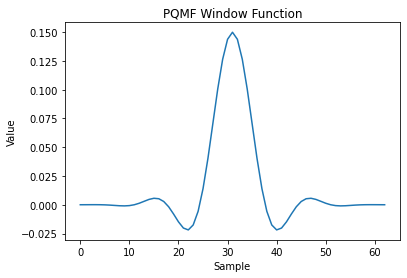

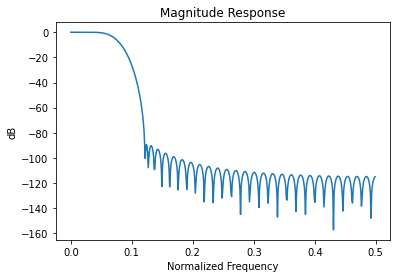

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 9)
%matplotlib inline

from scipy.signal import freqz
from parallel_wavegan.layers import design_prototype_filter

# check prototype filter
num_taps = 62
cutoff_ratio = 0.15
beta = 9.0
h = design_prototype_filter(num_taps, cutoff_ratio, beta)

plt.plot(h)
plt.title('PQMF Window Function')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()

f, H = freqz(h)
plt.plot(f / (2 * np.pi), 20*np.log10(np.abs(H)))
plt.title('Magnitude Response')
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')
plt.show()

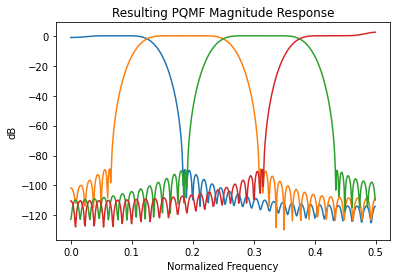

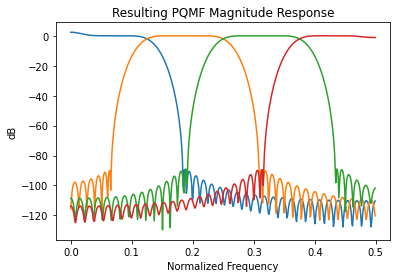

In [2]:
# check PQMF filter
from parallel_wavegan.layers import PQMF
num_subbands = 4
pqmf = PQMF(num_subbands, num_taps, cutoff_ratio, beta)

analysis_filter = pqmf.analysis_filter[:, 0]
synthesis_filter = pqmf.synthesis_filter[0]
for h in analysis_filter:
    f, H = freqz(h)
    plt.plot(f / (2 * np.pi), 20*np.log10(np.abs(H)))
    plt.title('Resulting PQMF Magnitude Response')
    plt.xlabel('Normalized Frequency')
    plt.ylabel('dB')
plt.show()
for h in synthesis_filter:
    f, H = freqz(h)
    plt.plot(f / (2 * np.pi), 20*np.log10(np.abs(H)))
    plt.title('Resulting PQMF Magnitude Response')
    plt.xlabel('Normalized Frequency')
    plt.ylabel('dB')
plt.show()

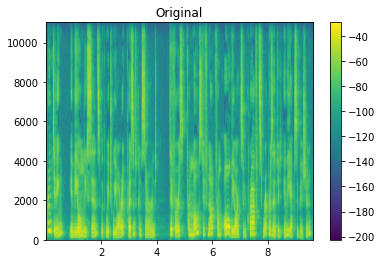

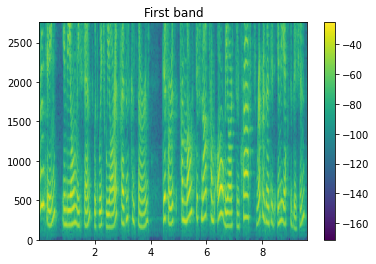

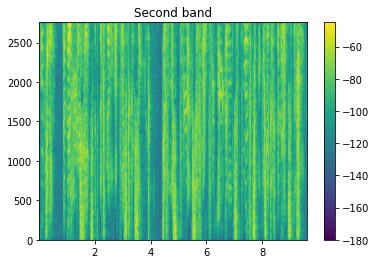

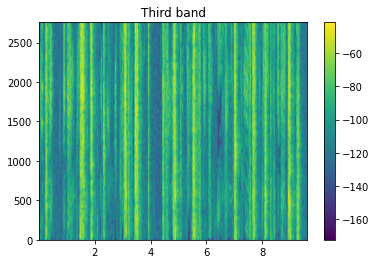

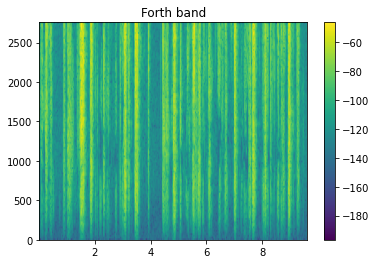

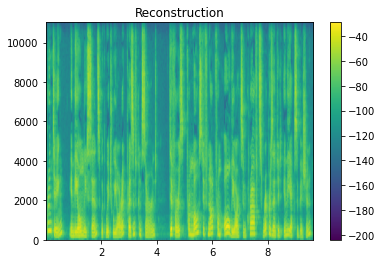

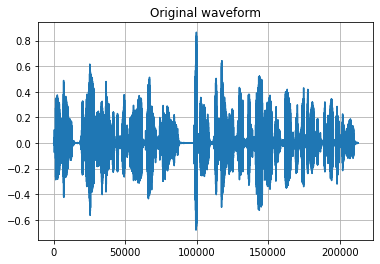

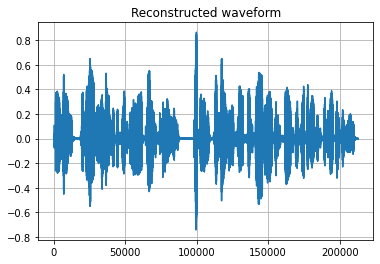

In [3]:
# check reconstruction
import soundfile as sf
import torch
wavpath = "../egs/ljspeech/voc1/downloads/LJSpeech-1.1/wavs/LJ001-0001.wav"
x, fs = sf.read(wavpath)
x = torch.from_numpy(x).view(1, 1, -1).float()
y = pqmf.analysis(x)
x_hat = pqmf.synthesis(y)

from IPython.display import Audio, display
plt.specgram(x[0, 0].numpy(), Fs=fs)
plt.colorbar()
plt.title("Original")
plt.show()
display(Audio(x[0, 0].numpy(), rate=fs))

plt.specgram(y[0, 0].numpy(), Fs=fs / 4)
plt.colorbar()
plt.title("First band")
plt.show()
display(Audio(y[0, 0].numpy(), rate=fs / 4))

plt.specgram(y[0, 1].numpy(), Fs=fs / 4)
plt.colorbar()
plt.title("Second band")
plt.show()
display(Audio(y[0, 1].numpy(), rate=fs / 4))

plt.specgram(y[0, 2].numpy(), Fs=fs / 4)
plt.colorbar()
plt.title("Third band")
plt.show()
display(Audio(y[0, 2].numpy(), rate=fs / 4))

plt.specgram(y[0, 3].numpy(), Fs=fs / 4)
plt.colorbar()
plt.title("Forth band")
plt.show()
display(Audio(y[0, 3].numpy(), rate=fs / 4))

plt.specgram(x_hat[0, 0].numpy(), Fs=fs)
plt.colorbar()
plt.title("Reconstruction")
plt.show()
display(Audio(x_hat[0, 0].numpy(), rate=fs))

plt.plot(x[0, 0].numpy())
plt.title("Original waveform")
plt.grid()
plt.show()
display(Audio(x[0, 0].numpy(), rate=fs))

plt.plot(x_hat[0, 0].numpy())
plt.title("Reconstructed waveform")
plt.grid()
plt.show()
display(Audio(x_hat[0, 0].numpy(), rate=fs))

NOTE (kan-bayashi):
> The power is slightly diffrent from the original.  
> I'm not sure this is correct or not.  
> Maybe I need to understand the filtering process more deeply.